In [1]:
import pandas as pd, numpy as np

%matplotlib inline

# DEAD ANIMALS

In [2]:
train = pd.read_csv('train.csv')
display(train.dtypes)
display(train.head())
display(train.describe())

AnimalID          object
Name              object
DateTime          object
OutcomeType       object
OutcomeSubtype    object
AnimalType        object
SexuponOutcome    object
AgeuponOutcome    object
Breed             object
Color             object
dtype: object

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A695104,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [3]:
import re
sterilized_pat = re.compile('.*(neutered|spayed).*', flags=re.IGNORECASE)

def purify_age(df):
    days_in_unit = {
    'day': 1,
    'days': 1,
    'week': 7,
    'weeks': 7,
    'month': 30,
    'months': 30,
    'years': 365,
    'year': 365
    }
    
    def strage_to_days(age):
        if not isinstance(age, str): return float('nan')
        age = age.split(' ')
        return int(age[0]) * days_in_unit[age[1]]
    df['AgeuponOutcome'] = df['AgeuponOutcome'].map(strage_to_days)

def purify_sex(df):
    df['Sterilized'] = df.SexuponOutcome.str.match(sterilized_pat)
    df.loc[df['Sterilized'].isnull(), 'Sterilized'] = 2
    df['Sterilized'] = df['Sterilized'].astype('int')
    def shorten_sex(sex):
        if isinstance(sex, str):
            if 'Male' in sex:
                return 0
            elif 'Female' in sex:
                return 1
        return 2 # the Unknown
    df['SexuponOutcome'] = df['SexuponOutcome'].map(shorten_sex).astype('int')
    
def purify_1(df):
    df = df.drop(['ID', 'AnimalID'], axis=1, errors='ignore')
    df['Name'] = pd.notnull(df['Name'])
    df['Mix'] = df.Breed.str.contains('Mix').astype('int')
    df['Breed'] = df.Breed.str.rstrip(' Mix')
    purify_age(df)
    purify_sex(df)
    return df

In [4]:
X = purify_1(train)
X.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Mix,Sterilized
0,True,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,0,365.0,Shetland Sheepdog,Brown/White,1,1
1,True,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,1,365.0,Domestic Shorthair,Cream Tabby,1,1
2,True,2015-01-31 12:28:00,Adoption,Foster,Dog,0,730.0,Pit Bull,Blue/White,1,1
3,False,2014-07-11 19:09:00,Transfer,Partner,Cat,0,21.0,Domestic Shorthair,Blue Cream,1,0
4,False,2013-11-15 12:52:00,Transfer,Partner,Dog,0,730.0,Lhasa Apso/Miniature Poodle,Tan,0,1


In [5]:
df = X[['Breed', 'AgeuponOutcome']].groupby('Breed').describe()
df[df['AgeuponOutcome', 'count'] > 100]

AgeuponOutcome                                  \
                                        count         mean          std   min   
Breed                                                                           
American Bulldog                        115.0   866.478261   718.065436   5.0   
American Staffordshire Terrier          104.0   941.625000   854.172673   2.0   
Australian Cattle Dog                   392.0   890.272959  1127.644638   7.0   
Australian Kelpie                       101.0   478.960396   632.389878  21.0   
Australian Shepherd                     177.0  1095.553672  1282.903777  28.0   
Beagle                                  146.0  1582.910959  1394.064110  30.0   
Border Collie                           246.0   993.321138  1270.271987  14.0   
Boxer                                   275.0  1048.909091  1106.237248  30.0   
Cairn Terrier                           112.0   685.982143   714.100846  30.0   
Catahoula                               163.0   790.214724   991.254092  30.0   
Chihuahua Longhair                      151.0  1019.960265  1050.491142   6.0   
Chihuahua Shorthair                    1851.0  1078.337115  1178.801408   4.0   
Dachshund                               364.0  1181.478022  1231.437592   2.0   
Domestic Longhair                       542.0  1021.911439  1417.130079   0.0   
Domestic Medium Hair                    881.0   530.437003   978.291017   3.0   
Domestic Shorthair                     8937.0   428.381112   844.626310   0.0   
German Shepherd                         652.0   892.253067  1078.210628   2.0   
Jack Russell Terrier                    162.0  1172.580247  1349.304595  28.0   
Labrador Retriever                     1432.0   961.934358  1195.602491   1.0   
Miniature Poodle                        254.0  1358.484252  1295.898579  30.0   
Miniature Schnauzer                     158.0  1411.455696  1316.632491  60.0   
Pit Bull                               1972.0   865.593306   821.283950   1.0   
Rat Terrier                             170.0  1525.105882  1548.908770   6.0   
Rottweiler                              152.0  1194.065789  1071.716088   0.0   
Shih Tzu                                153.0  1534.882353  1297.703285   7.0   
Siamese                                 413.0   695.450363  1172.716271   2.0   
Siberian Husky                          168.0  1081.130952  1078.709129  60.0   
Staffordshire                           102.0   874.460784   645.364624  60.0   
Yorkshire Terrier                       167.0  1438.958084  1392.182063   3.0   

                                                                
                                  25%     50%      75%     max  
Breed                                                           
American Bulldog                365.0   730.0  1095.00  2920.0  
American Staffordshire Terrier  365.0   730.0  1095.00  4015.0  
Australian Cattle Dog           150.0   365.0  1095.00  5840.0  
Australian Kelpie               120.0   330.0   730.00  4015.0  
Australian Shepherd             180.0   730.0  1460.00  6205.0  
Beagle                          365.0  1095.0  2555.00  5475.0  
Border Collie                   150.0   365.0  1095.00  5840.0  
Boxer                           300.0   730.0  1460.00  5110.0  
Cairn Terrier                   232.5   365.0   730.00  3650.0  
Catahoula                       180.0   365.0  1095.00  5110.0  
Chihuahua Longhair              300.0   730.0  1460.00  5475.0  
Chihuahua Shorthair             365.0   730.0  1460.00  6570.0  
Dachshund                       300.0   730.0  1825.00  5840.0  
Domestic Longhair                60.0   365.0  1460.00  6570.0  
Domestic Medium Hair             60.0   120.0   365.00  7300.0  
Domestic Shorthair               30.0    90.0   365.00  7300.0  
German Shepherd                 180.0   365.0  1095.00  5840.0  
Jack Russell Terrier            157.5   730.0  1825.00  5475.0  
Labrador Retriever              120.0   365.0  1460.00  6205.0  
Miniatur

In [6]:
X.isnull().sum()

Name                  0
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        0
AgeuponOutcome       18
Breed                 0
Color                 0
Mix                   0
Sterilized            0
dtype: int64

In [7]:
X[['AnimalType', 'Mix', 'AgeuponOutcome']].groupby(['AnimalType', 'Mix']).describe()

AgeuponOutcome                                               \
                        count         mean          std  min    25%    50%   
AnimalType Mix                                                               
Cat        0            281.0   604.690391  1107.188437  2.0   60.0  120.0   
           1          10836.0   493.361849   937.101632  0.0   30.0   90.0   
Dog        0           4150.0  1013.397590  1129.717141  0.0  240.0  730.0   
           1          11444.0  1004.058022  1124.534078  0.0  270.0  730.0   

                                
                   75%     max  
AnimalType Mix                  
Cat        0     730.0  6935.0  
           1     365.0  7300.0  
Dog        0    1460.0  6935.0  
           1    1460.0  6935.0

In [8]:
display(
    X.loc[X['Sterilized'] == 2],
    X.loc[X['Mix'] == 2],
    X.loc[X['SexuponOutcome'] == 2].head(),
    X.loc[X['AgeuponOutcome'].isnull()],
    X.loc[X['AgeuponOutcome'].isnull()].describe())

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Mix,Sterilized
3174,True,2013-11-27 16:11:00,Return_to_owner,NaN,Dog,2,2555.0,Dachshund,Brown Merle,0,2


,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Mix,Sterilized


,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Mix,Sterilized
7,False,2015-04-30 17:02:00,Transfer,Partner,Cat,2,21.0,Domestic Shorthair,Brown Tabby,1,0
10,False,2013-12-05 15:50:00,Transfer,SCRP,Cat,2,730.0,Domestic Shorthair,Black,1,0
64,False,2014-07-17 17:31:00,Transfer,Partner,Cat,2,14.0,Domestic Shorthair,Black,1,0
68,False,2015-06-16 09:00:00,Transfer,SCRP,Cat,2,60.0,Domestic Shorthair,Brown Tabby/White,1,0
81,False,2015-09-22 12:10:00,Euthanasia,Suffering,Cat,2,14.0,Domestic Shorthair,Blue Tabby,1,0


,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Mix,Sterilized
2480,False,2016-02-16 10:17:00,Transfer,SCRP,Cat,0,NaN,Domestic Shorthair,Blue Tabby/White,1,0
2912,False,2016-02-18 19:07:00,Transfer,SCRP,Cat,2,NaN,Domestic Shorthair,Gray Tabby,1,0
3766,False,2016-02-16 18:55:00,Transfer,SCRP,Cat,1,NaN,Domestic Shorthair,Brown Tabby,1,0
3875,False,2016-02-20 16:37:00,Euthanasia,Suffering,Dog,0,NaN,Toy Poodle,White,1,0
4498,False,2016-02-09 19:43:00,Transfer,SCRP,Cat,1,NaN,Domestic Shorthair,Brown Tabby,1,0
5137,False,2016-02-16 10:17:00,Transfer,SCRP,Cat,1,NaN,Domestic Shorthair,Black,1,1
5691,False,2016-02-16 10:17:00,Transfer,SCRP,Cat,2,NaN,Domestic Shorthair,Black Tabby/White,1,0
7005,False,2016-02-16 10:17:00,Transfer,SCRP,Cat,2,NaN,Domestic Shorthair,Black,1,0
8420,False,2016-02-16 10:16:00,Transfer,SCRP,Cat,0,NaN,Domestic Shorthair,Blue Tabby/White,1,0
17464,False,2016-02-16 18:55:00,Transfer,SCRP,Cat,1,NaN,Domestic Shorthair,Torbie,1,0


,SexuponOutcome,AgeuponOutcome,Mix,Sterilized
count,18.000000,0.0,18.0,18.000000
mean,0.888889,NaN,1.0,0.055556
std,0.758395,NaN,0.0,0.235702
min,0.000000,NaN,1.0,0.000000
25%,0.000000,NaN,1.0,0.000000
50%,1.000000,NaN,1.0,0.000000
75%,1.000000,NaN,1.0,0.000000
max,2.000000,NaN,1.0,1.000000


In [9]:
def impute_age(src, dst):
    for f, g in dst.loc[dst['AgeuponOutcome'].isnull()].groupby(['Breed', 'Mix', 'SexuponOutcome']):
        gtrain = src.loc[
                (src['Breed'] == f[0]) &
                (src['Mix'] == f[1]) &
                ( (src['SexuponOutcome'] == f[2]) ), # if f[2] else True ),
            'AgeuponOutcome']
        med, cnt = gtrain.median(), gtrain.count()
        if cnt < 30: med = gtrain.mean()
        dst.loc[dst['AgeuponOutcome'].isnull() &
             (dst['Breed'] == f[0]) &
             (dst['Mix'] == f[1]) &
             (dst['SexuponOutcome'] == f[2]),
                'AgeuponOutcome'] = med
        print('Imputed age %s from %s samples of %s %s %s' % (
              med, cnt,
              f[0],
              'Mix' if f[1] else '',
              'Male' if f[2] == 0 else ('Female' if f[2] == 1 else 'Bisexual')))

In [10]:
impute_age(X, X)

Imputed age 365.0 from 231 samples of Domestic Longhair Mix Male
Imputed age 90.0 from 3927 samples of Domestic Shorthair Mix Male
Imputed age 120.0 from 3967 samples of Domestic Shorthair Mix Female
Imputed age 21.0 from 900 samples of Domestic Shorthair Mix Bisexual
Imputed age 1467.82608696 from 23 samples of Toy Poodle Mix Male


In [11]:
test = pd.read_csv('test.csv')
X_te = purify_1(test)
X_te.head()

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Mix,Sterilized
0,True,2015-10-12 12:15:00,Dog,1,300.0,Labrador Retriever,Red/White,1,0
1,True,2014-07-26 17:59:00,Dog,1,730.0,German Shepherd/Siberian Husky,Black/Tan,0,1
2,True,2016-01-13 12:20:00,Cat,0,365.0,Domestic Shorthair,Brown Tabby,1,1
3,True,2013-12-28 18:12:00,Dog,0,120.0,Collie Smooth,Tricolor,1,0
4,True,2015-09-24 17:59:00,Dog,0,730.0,Miniature Poodle,White,1,1


In [12]:
test.isnull().sum()

ID                   0
Name              3225
DateTime             0
AnimalType           0
SexuponOutcome       0
AgeuponOutcome       6
Breed                0
Color                0
dtype: int64

In [13]:
X_te.loc[X_te['AgeuponOutcome'].isnull()]

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Mix,Sterilized
763,False,2016-02-18 19:07:00,Cat,2,NaN,Domestic Shorthair,Black,1,0
2498,False,2016-02-16 18:54:00,Cat,0,NaN,Domestic Longhair,Blue/White,1,0
6323,False,2016-02-10 18:49:00,Cat,0,NaN,Domestic Shorthair,Black,1,0
6347,False,2016-02-12 18:27:00,Cat,0,NaN,Domestic Shorthair,Brown Tabby,1,0
7626,False,2016-02-19 18:31:00,Cat,1,NaN,Domestic Shorthair,Tortie,1,0
10754,False,2016-02-12 18:33:00,Cat,0,NaN,Domestic Shorthair,White/Black,1,1


In [14]:
X.loc[X['Breed'] == 'Domestic Shorthair', ['AgeuponOutcome', 'Mix']].groupby(['Mix']).describe()

AgeuponOutcome                                                         
             count        mean          std  min   25%   50%    75%     max
Mix                                                                        
0            143.0  566.510490  1162.233443  2.0  60.0  90.0  365.0  6935.0
1           8810.0  425.520431   837.735007  0.0  30.0  90.0  365.0  7300.0

In [15]:
X.loc[X['Breed'] == 'Domestic Longhair', ['AgeuponOutcome', 'SexuponOutcome', 'Mix']].groupby(['SexuponOutcome', 'Mix']).describe()

AgeuponOutcome                                         \
                            count         mean          std   min    25%   
SexuponOutcome Mix                                                         
0              0              8.0   953.750000  1261.282652  60.0   90.0   
               1            232.0  1050.965517  1418.891744   3.0   60.0   
1              0             15.0   704.666667   952.478846  30.0   90.0   
               1            258.0  1061.806202  1495.220690   0.0   60.0   
2              1             30.0   609.033333   746.533759   7.0  142.5   

                                           
                      50%     75%     max  
SexuponOutcome Mix                         
0              0    410.0  1277.5  3650.0  
               1    365.0  1460.0  6570.0  
1              0    180.0  1095.0  3285.0  
               1    365.0  1460.0  6570.0  
2              1    365.0   730.0  3650.0

In [16]:
impute_age(X, X_te)

Imputed age 365.0 from 232 samples of Domestic Longhair Mix Male
Imputed age 90.0 from 3931 samples of Domestic Shorthair Mix Male
Imputed age 120.0 from 3975 samples of Domestic Shorthair Mix Female
Imputed age 21.0 from 904 samples of Domestic Shorthair Mix Bisexual


In [18]:
display(X.head(), X_te.head())

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Mix,Sterilized
0,True,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,0,365.0,Shetland Sheepdog,Brown/White,1,1
1,True,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,1,365.0,Domestic Shorthair,Cream Tabby,1,1
2,True,2015-01-31 12:28:00,Adoption,Foster,Dog,0,730.0,Pit Bull,Blue/White,1,1
3,False,2014-07-11 19:09:00,Transfer,Partner,Cat,0,21.0,Domestic Shorthair,Blue Cream,1,0
4,False,2013-11-15 12:52:00,Transfer,Partner,Dog,0,730.0,Lhasa Apso/Miniature Poodle,Tan,0,1


,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Mix,Sterilized
0,True,2015-10-12 12:15:00,Dog,1,300.0,Labrador Retriever,Red/White,1,0
1,True,2014-07-26 17:59:00,Dog,1,730.0,German Shepherd/Siberian Husky,Black/Tan,0,1
2,True,2016-01-13 12:20:00,Cat,0,365.0,Domestic Shorthair,Brown Tabby,1,1
3,True,2013-12-28 18:12:00,Dog,0,120.0,Collie Smooth,Tricolor,1,0
4,True,2015-09-24 17:59:00,Dog,0,730.0,Miniature Poodle,White,1,1


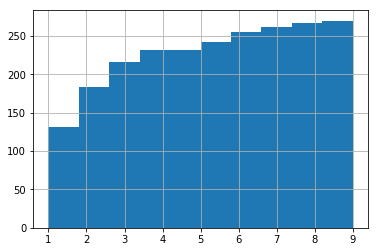

In [27]:
clrs_cnts = pd.concat((X.Color, X_te.Color)).value_counts()
clrs_cnts[clrs_cnts < 10].hist(cumulative=True)

In [28]:
clrs_cnts

Black/White                4043
Black                      3265
Brown Tabby                2359
Brown Tabby/White          1333
White                      1333
Brown/White                1257
Orange Tabby               1187
Tan/White                  1114
Tricolor                   1067
Blue/White                 1004
Black/Tan                   986
White/Black                 945
Tan                         910
Brown                       895
White/Brown                 771
Tortie                      770
Calico                      710
Blue                        674
Brown Brindle/White         661
Orange Tabby/White          629
Black/Brown                 624
Blue Tabby                  616
White/Tan                   557
Brown/Black                 493
Torbie                      474
Red/White                   471
Red                         470
Brown Brindle               347
Blue Tabby/White            336
Chocolate/White             321
                           ... 
Lynx Poi